In [18]:
%load_ext ipydex.displaytools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import sys
sys.path.append('/Users/brandonhosley/Documents/GitHub/Schoolwork/2023Q2 - Statistical Machine Learning/Project')
import ProjectFunctions as PF

The ipydex.displaytools extension is already loaded. To reload it, use:
  %reload_ext ipydex.displaytools


In [22]:
df = pd.read_csv('../../Datasets/diabetes_data.csv')
df.head()

label = 'Diabetes'
fields=['Rho','Imbalance Technique','Classifier','Training f1','Test f1',
        'Runtime','Minority Count','k','n-Estimators','MaxDepth','MaxFeatures']

le = LabelEncoder()
df.Diabetes = le.fit_transform(df.Diabetes)

df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1


<AxesSubplot:title={'center':'Correlation with Diabetes'}>

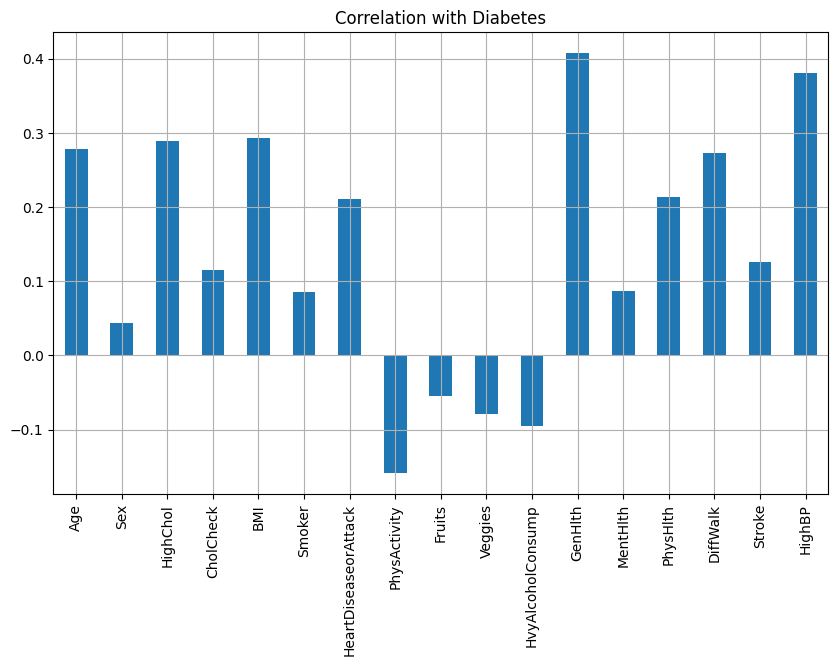

In [4]:
df.drop(['Diabetes'], axis=1).corrwith(df['Diabetes']).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes")

<AxesSubplot:>

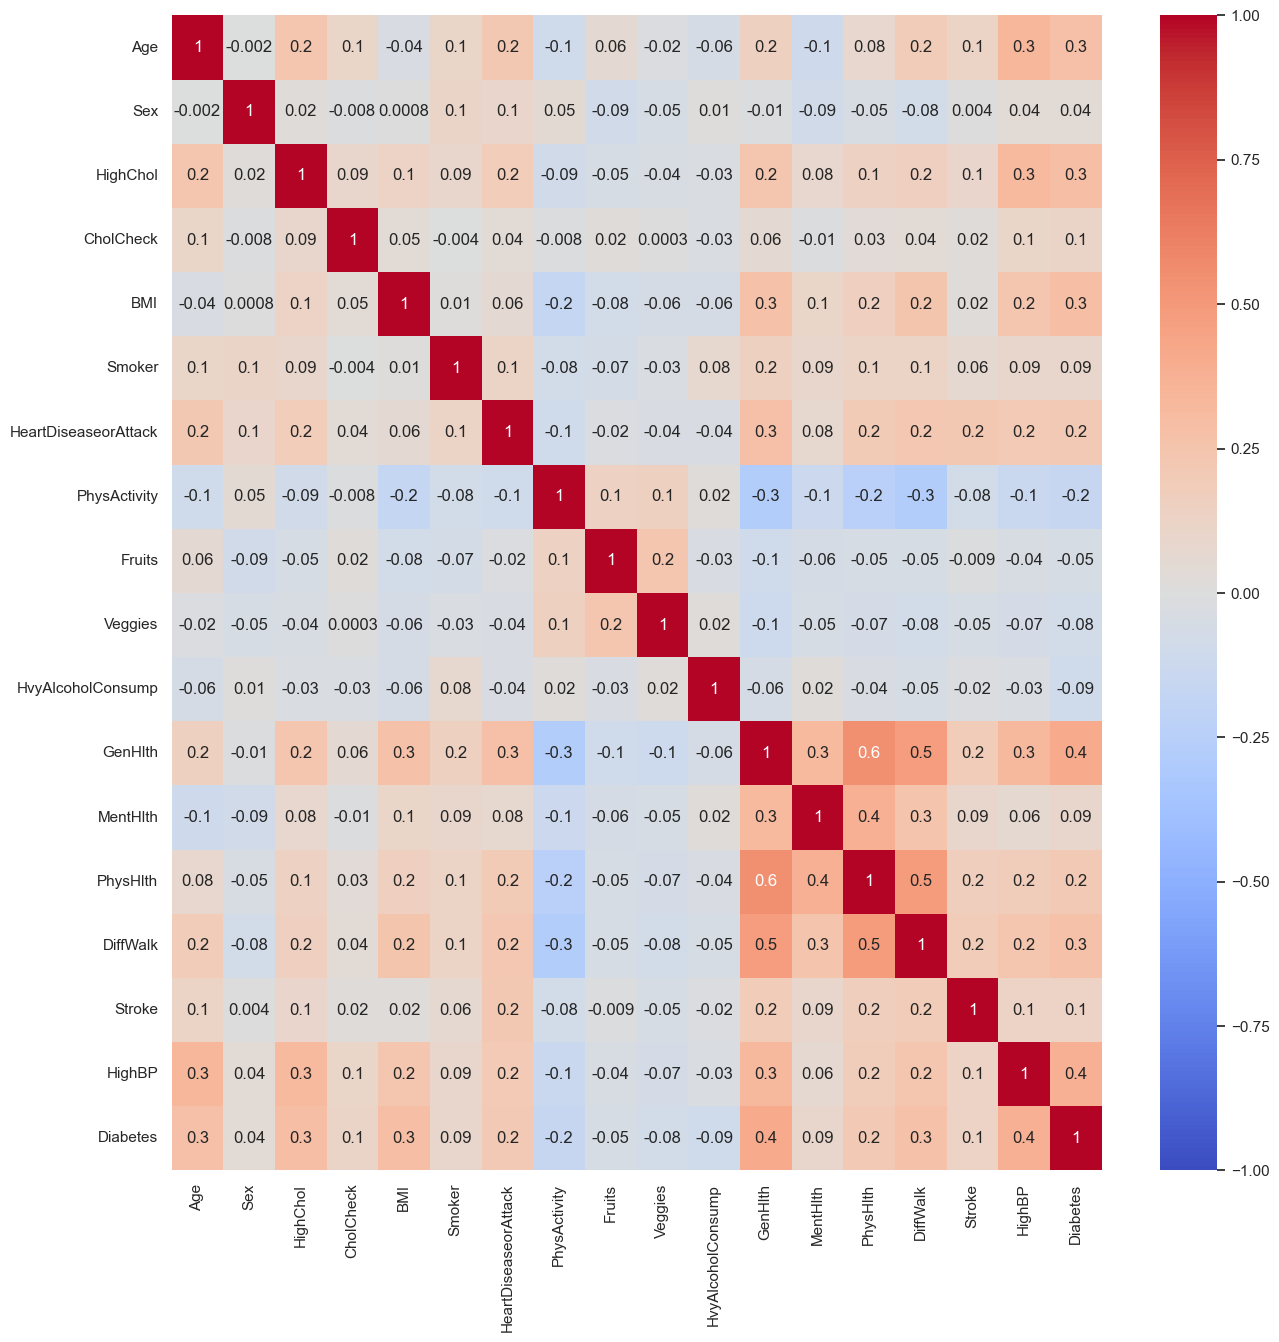

In [14]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

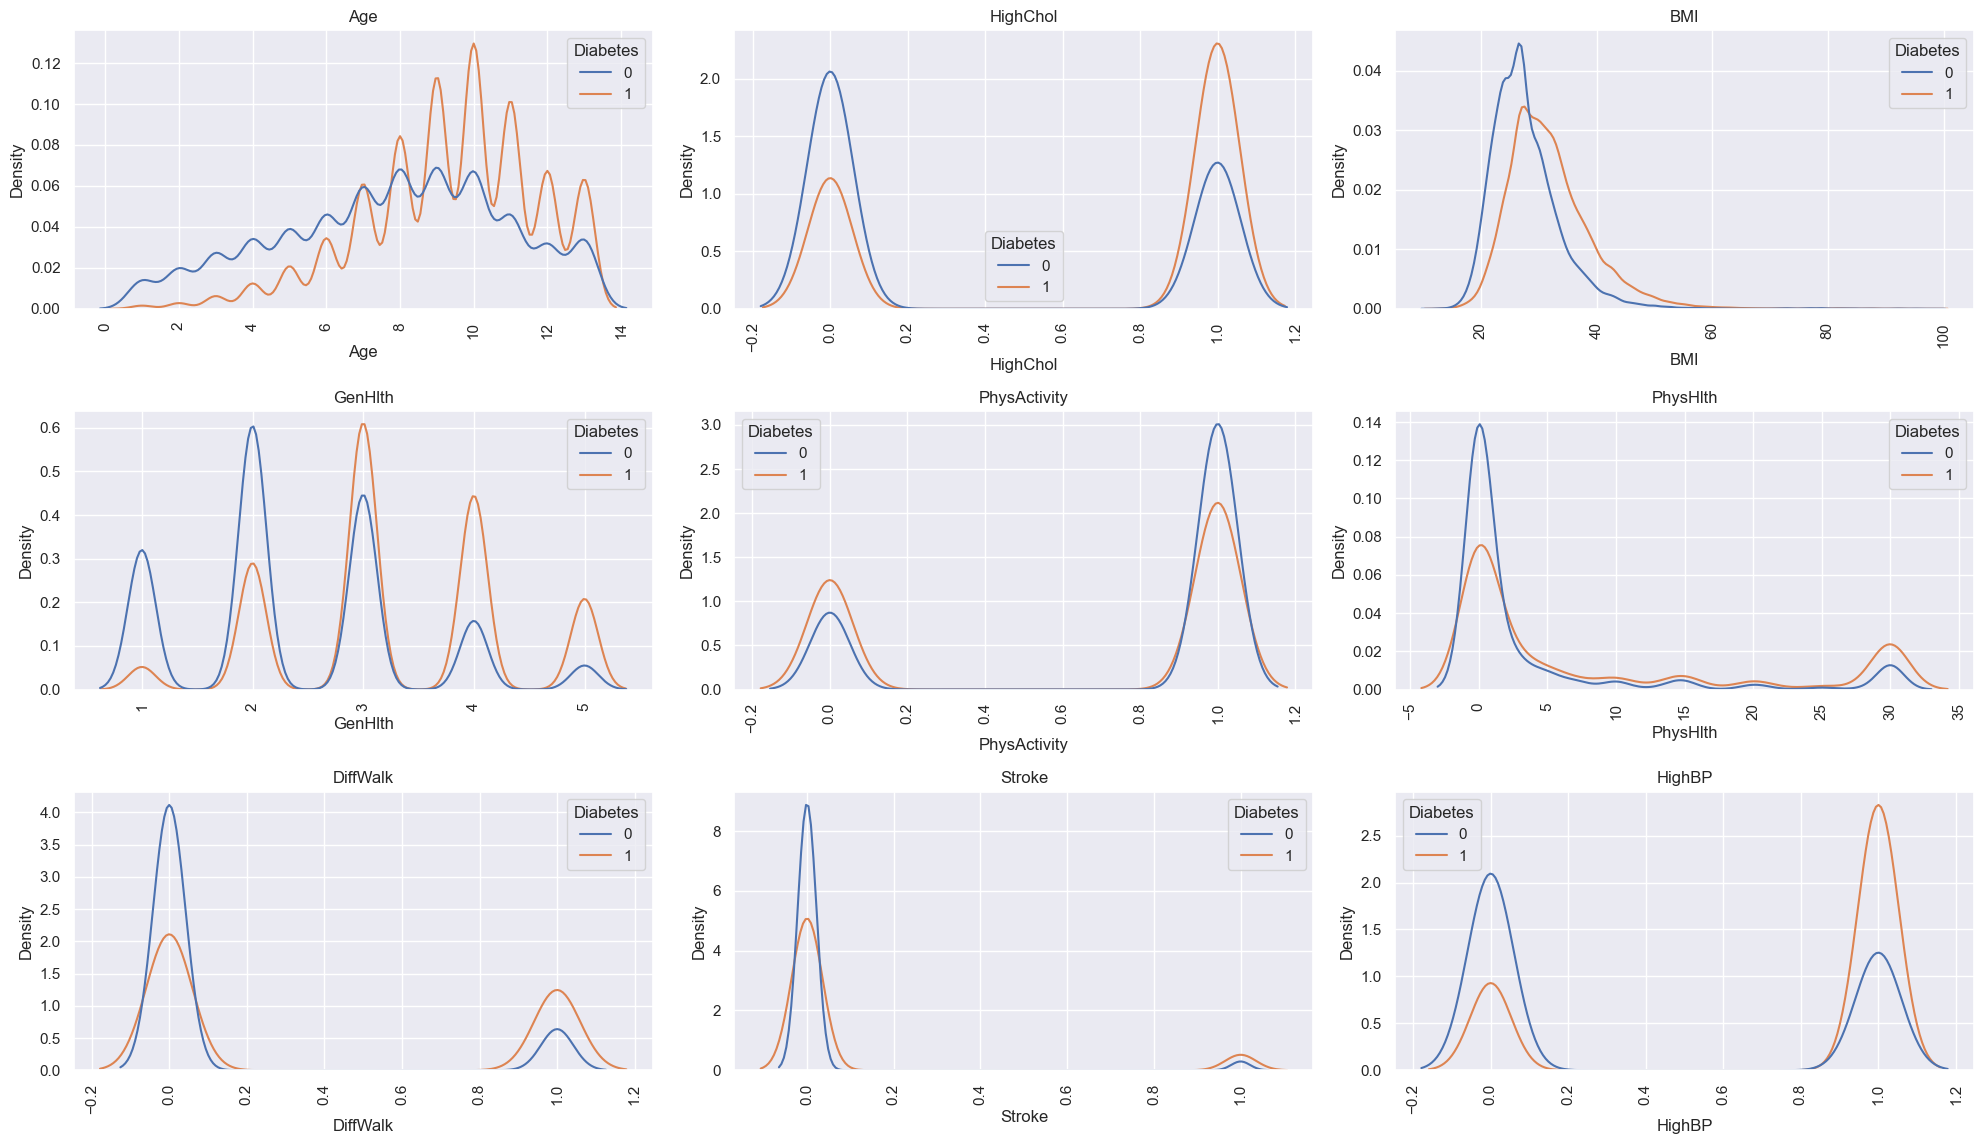

In [28]:
dm = df[["Age", "HighChol", "BMI",'GenHlth', "PhysActivity", "PhysHlth", 'DiffWalk', 'Stroke', "HighBP", "Diabetes"]]

# All data columns except for color
feature_cols = [x for x in dm.columns if x not in ['Diabetes']]
plt.figure(figsize=(20,30))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,3,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    sns.kdeplot(data=dm, x=feature_cols[i], hue='Diabetes')
    
plt.tight_layout()